## Exercise

1. Preprocessing a weather dataset from kaggle using pandas
2. Training time series forecasting model to predit temperature using Neural Prophet
3. Forecasting temperature into the future using the trained model

Database: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## O. Install and Import Dependencies

## 1. Read in Data and Process Dates

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Checking unique locations that we got in this dataset
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [4]:
# Checking weather variable of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Filtiring to Melbourne and changing date to a datetime datatype
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\calde\AppData\Local\Temp\ipykernel_8220\840405784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date'] = pd.to_datetime(melb['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


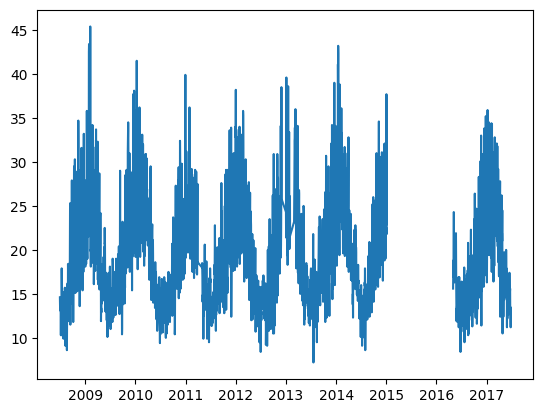

In [6]:
# Checking Melb Temp
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

## Notes
1. Always that we are working with NP we must have at least two variables in our dataset:
- Datetime column
- Numerical column

2. As you can notice in the last graphic we have some missing values between 2015-2016. The ideal is not imputing the data rather that taking the interval of time that we have completed. In this case from 2009-2015

WARNING - (py.warnings._showwarnmsg) - C:\Users\calde\AppData\Local\Temp\ipykernel_8220\2723601389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x: x.year)



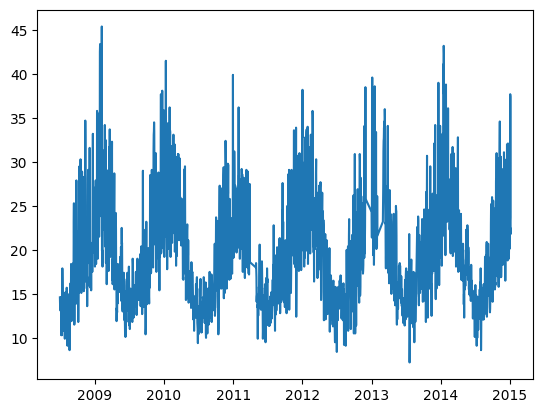

In [7]:
# Shorten our dataset from 2009-2015
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [8]:
# Finally we drop our na to have a cleaner dataset
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
# Name the date column as ds as Temp3pm as y
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\calde\AppData\Local\Temp\ipykernel_8220\3773587568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


## 2. Train Model

In [9]:
# Creating instance of our model
m = NeuralProphet()

#### Algunos Parametros que puedo usar en NeuralProphet

- n_forecasts: Especifica la cantidad de pasos en el futuro para los que deseas realizar predicciones.
- n_lags: Define la cantidad de pasos de tiempo anteriores que se utilizarán como entradas para predecir el siguiente paso de tiempo.
- num_hidden_layers: Define el número de capas ocultas en la red neuronal.
- d_hidden: Especifica la dimensión oculta de las capas ocultas.
- learning_rate: Es la tasa de aprendizaje utilizada en el algoritmo de optimización para actualizar los pesos de la red neuronal durante el entrenamiento.
- epochs: Número de épocas de entrenamiento, es decir, cuántas veces se pasa por todo el conjunto de datos durante el entrenamiento.
- batch_size: Tamaño del lote utilizado durante el entrenamiento, es decir, cuántas muestras se utilizan para calcular el error antes de actualizar los pesos.
- loss_func: Función de pérdida utilizada para evaluar el rendimiento del modelo durante el entrenamiento. Puede ser, por ejemplo, la pérdida de media cuadrática (MSE) o la pérdida de media absoluta (MAE).
- normalize: Booleano que indica si se debe normalizar el conjunto de datos antes de entrenar el modelo.
- impute_missing: Booleano que indica si se deben imputar los valores faltantes en el conjunto de datos antes de entrenar el modelo.
- seasonality_mode: Define el modo de estacionalidad, como 'multiplicative' o 'additive', que se utiliza para modelar los patrones estacionales en los datos.
- yearly_seasonality: Define si se debe modelar la estacionalidad anual en los datos.
- weekly_seasonality: Define si se debe modelar la estacionalidad semanal en los datos.
- daily_seasonality: Define si se debe modelar la estacionalidad diaria en los datos.
- normalize_y: Booleano que indica si se debe normalizar la variable de salida antes de entrenar el modelo.

In [10]:
model = m.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Pyt

Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 5876.22it/s, loss=0.033, v_num=0, MAE=2.990, RMSE=3.970, Loss=0.0338, RegLoss=0.000]   


#### Análizando los resultados

- Loss: Es la función de pérdida general que se utiliza para evaluar el rendimiento del modelo durante el entrenamiento. En este caso, la pérdida es 0.033, lo que indica cuánto se desvían las predicciones del modelo de los valores reales en promedio.
- v_num: Es un número de versión que generalmente indica la versión del modelo o algún otro tipo de identificador. En este caso, v_num es 0, lo que significa que es la versión 0 del modelo.
- MAE (Mean Absolute Error): Es la media del valor absoluto de los errores entre las predicciones del modelo y los valores reales. En este caso, MAE es 2.990, lo que significa que, en promedio, las predicciones del modelo difieren aproximadamente 2.990 unidades del valor real.
- RMSE (Root Mean Square Error): Es la raíz cuadrada de la media de los errores cuadrados entre las predicciones del modelo y los valores reales. RMSE es 3.970, lo que indica la raíz cuadrada del promedio de los errores cuadrados.
- Loss: Otra vez, este es el valor de la función de pérdida, aunque parece ser una versión ligeramente diferente o una métrica calculada de manera diferente a la primera mencionada.
- RegLoss (Regularization Loss): Es una medida de la penalización aplicada a los pesos del modelo para evitar el sobreajuste. Si el modelo utiliza regularización, este valor mostrará cuánto está contribuyendo la regularización a la pérdida total.

### 3. Forecast Away

In [11]:
# Here we are really creating our forecast
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be remov

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 99.26it/s] 


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.087898,20.082161,4.661698,0.344041
1,2015-01-07,None,24.861401,20.083099,4.794021,-0.015721
2,2015-01-08,None,24.985847,20.084040,4.924283,-0.022477
3,2015-01-09,None,25.087059,20.084980,5.051826,-0.049747
4,2015-01-10,None,25.194607,20.085918,5.175906,-0.067220


In [13]:
plot1 = m.plot(forecast)
plot1

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [14]:
plt2 = m.plot_components(forecast)
plt2

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




### 4. Save Model

In [18]:
# Guardar el modelo
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [20]:
# Eliminar el modelo
del m

In [21]:
# Volver a guardar el modelo
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)